# HW 5
#### Bryan Mui 506021334

For Assignment 5, find the attached csv file: Data.csv. Download Data.csv.

In this dataset, the first two columns are features X_1 and X_2 and the last column is the response. Finish the following step:

(1) Split the dataset into training and testing at the ratio 67:33 

(2) Train a linear SVM on training set and report the testing accuracy

(3) Train a Kernel SVM (Gaussian) on training set and report the testing accuracy

(4) Compare these two testing accuracy and explain why there is a huge difference

(5) Plot the decision boundary of Linear SVM

(6) Plot the decision boundary Kernel SVM to validate your conclusion

In [41]:
# import
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore


In [42]:
df = pd.read_csv('Data.csv')
print(df.shape)
df.head()

(500, 4)


,Unnamed: 0,X_1,X_2,Y
0,0,-0.023123,2.190420,1.0
1,1,0.449091,0.014470,0.0
2,2,0.370438,-0.062110,0.0
3,3,1.313443,0.395908,1.0
4,4,1.666860,1.166837,1.0


(1) Split the dataset into training and testing at the ratio 67:33 

In [43]:
# split the data 67-33
x = df[['X_1', 'X_2']]
y = df['Y']
# split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=777)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(335, 2)
(165, 2)
(335,)
(165,)


(2) Train a linear SVM on training set and report the testing accuracy

In [44]:
from sklearn import svm # type: ignore  
m1 = svm.SVC(kernel='linear')
m1.fit(x_train, y_train)
y_pred = m1.predict(x_test)

# report the testing accuracy 
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of Linear SVM: {accuracy}")

Accuracy of Linear SVM: 0.5818181818181818


(3) Train a Kernel SVM (Gaussian) on training set and report the testing accuracy

In [45]:
m2 = svm.SVC(kernel='rbf')
m2.fit(x_train, y_train)
y_pred = m2.predict(x_test)

# report the testing accuracy 
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian SVM: {accuracy}")

Accuracy of Gaussian SVM: 0.9575757575757575


(4) Compare these two testing accuracy and explain why there is a huge difference

The Gaussian SVM had an accuracy of around 96% while the linear SVM model had an accuracy of only 58%. This means that the Gaussian Kernel was much better in terms of predictive accuracy that the linear kernel. As for why there is a huge difference, the linear kernel will try to find a linear association between the data, while the Gaussian Kernel is infinitely dimensional, and tries to find a radial association between groups in the data. This means that the Gaussian Kernel would find a non-linear association much easier than the linear kernel would. Also the radial kernel draws associations locally to the training data, where only nearby observations will effect the prediction, which may have enabled it to perform better in this data set

(5) Plot the decision boundary of Linear SVM

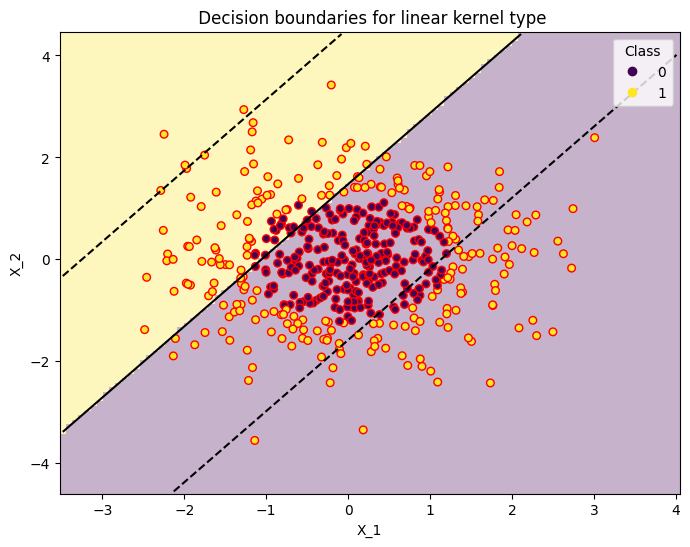

In [62]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.pyplot import figure


def plot_decision_boundary(kernel, model, x, y):
  fig, ax = plt.subplots(figsize=(8, 6))

  common_params = {"estimator": model, "X": x, "ax": ax}

  DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3
  )
  DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=['k', 'k', 'k'],
    linestyles=['--', '-', '--'],
  )

  scatter = ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=30, edgecolors="r")
  handles, labels = scatter.legend_elements()
  ax.legend(handles, labels, title="Class")
  ax.set_title(f" Decision boundaries for {kernel} kernel type")


plot_decision_boundary('linear', m1, x, y)


(6) Plot the decision boundary Kernel SVM to validate your conclusion

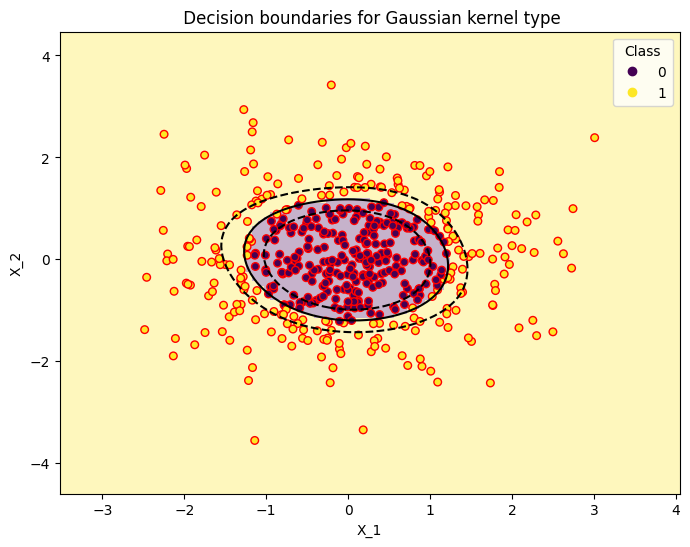

In [63]:
plot_decision_boundary('Gaussian', m2, x, y)

As we can see, the classification boundary is a non-linear shape which means that the Gaussian kernel would be much better at drawing the decision boundary than the linear SVM kernel